In [1]:
import tensorflow as tf
import numpy as np
import mlp.tf_utils as utils
from mlp.data_providers import AugmentedCIFAR10DataProvider, AugmentedCIFAR100DataProvider, CIFAR100DataProvider, CIFAR10DataProvider
from mlp.image_transforms import random_flip, random_crop, center_crop, random_flip_small
from mlp.Conv_models import ConvModel, TwoTaskConvModel, TwoTaskConvModelSoftSharing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seed = 12345 
rng = np.random.RandomState(seed)

In [2]:
#### event file dirs #####

b_train_1 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/train/events.out.tfevents.1498489049.ben-desktop"
b_valid_1 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/CIFAR_10_vs_20/tf-log/baseline_with_1.0_of_the_data/2017-06-26_15-57-29/valid/events.out.tfevents.1498489049.ben-desktop"

train_1 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_3/2017-06-23_14-28-44/train/events.out.tfevents.1498224524.ben-desktop"
valid_1 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_3/2017-06-23_14-28-44/valid/events.out.tfevents.1498224525.ben-desktop"
other_1 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_bifurcations/tf-log/MTL_soft_with_1.0_of_the_data_and_bif_3/2017-06-23_14-28-44/other/events.out.tfevents.1498224525.ben-desktop"

b_train_0_75 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/baseline_with_0.75_of_the_data/2017-06-28_19-04-06/train/events.out.tfevents.1498673046.ben-desktop"
b_valid_0_75 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/baseline_with_0.75_of_the_data/2017-06-28_19-04-06/valid/events.out.tfevents.1498673046.ben-desktop"

train_0_75 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.75_of_the_data/2017-06-23_16-26-26/train/events.out.tfevents.1498231586.ben-desktop"
valid_0_75 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.75_of_the_data/2017-06-23_16-26-26/valid/events.out.tfevents.1498231587.ben-desktop"
other_0_75 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.75_of_the_data/2017-06-23_16-26-26/other/events.out.tfevents.1498231587.ben-desktop"

b_train_0_5 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/baseline_with_0.5_of_the_data/2017-06-23_18-32-46/train/events.out.tfevents.1498239166.ben-desktop"
b_valid_0_5 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/baseline_with_0.5_of_the_data/2017-06-23_18-32-46/valid/events.out.tfevents.1498239166.ben-desktop"

train_0_5 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.5_of_the_data/2017-06-23_18-05-14/train/events.out.tfevents.1498237514.ben-desktop"
valid_0_5 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.5_of_the_data/2017-06-23_18-05-14/valid/events.out.tfevents.1498237515.ben-desktop"
other_0_5 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.5_of_the_data/2017-06-23_18-05-14/other/events.out.tfevents.1498237515.ben-desktop"

b_train_0_25 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/baseline_with_0.25_of_the_data/2017-06-23_19-19-57/train/events.out.tfevents.1498241997.ben-desktop"
b_valid_0_25 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/baseline_with_0.25_of_the_data/2017-06-23_19-19-57/valid/events.out.tfevents.1498241997.ben-desktop"

train_0_25 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.25_of_the_data/2017-06-23_19-05-10/train/events.out.tfevents.1498241110.ben-desktop"
valid_0_25 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.25_of_the_data/2017-06-23_19-05-10/valid/events.out.tfevents.1498241110.ben-desktop"
other_0_25 = "/home/ben/Dissertation/Multitask-Learning-With-GANs/2_mtl_classifier/varying_dataset_sizes/tf-log/MTL_soft_with_0.25_of_the_data/2017-06-23_19-05-10/other/events.out.tfevents.1498241110.ben-desktop"

In [5]:
print("############# BASELINE_1_TRAIN ###########")
print("")
print("")
b_train_1_stats = utils.event_file_to_stats_dict(b_train_1)
print("ACCURACIES")
b_train_1_acc = utils.only_stats_with_keyword(b_train_1_stats, "accuracy")
print(b_train_1_acc.keys())
print("")
print("ERRORS")
b_train_1_error = utils.only_stats_with_keyword(b_train_1_stats, "error")
print(b_train_1_error.keys())
print("")
print("")

print("############# BASELINE_1_VALID ###########")
print("")
print("")
b_valid_1_stats = utils.event_file_to_stats_dict(b_valid_1)
print("ACCURACIES")
b_valid_1_acc = utils.only_stats_with_keyword(b_valid_1_stats, "accuracy")
print(b_valid_1_acc.keys())
print("")
print("ERRORS")
b_valid_1_error = utils.only_stats_with_keyword(b_valid_1_stats, "error")
print(b_valid_1_error.keys())
print("")
print("")

print("####### MTL_1_TRAIN ##########")
print("")
print("")
train_1_stats = utils.event_file_to_stats_dict(train_1)
print("ACCURACIES")
train_1_acc = utils.only_stats_with_keyword(train_1_stats, "accuracy")
print(train_1_acc.keys())
print("")
print("ERRORS")
train_1_error = utils.only_stats_with_keyword(train_1_stats, "error")
print(train_1_error.keys())
print("")
print("")

print("####### MTL_1_VALID ##########")
print("")
print("")
valid_1_stats = utils.event_file_to_stats_dict(valid_1)
print("ACCURACIES")
valid_1_acc = utils.only_stats_with_keyword(valid_1_stats, "accuracy")
print(valid_1_acc.keys())
print("")
print("ERRORS")
valid_1_error = utils.only_stats_with_keyword(valid_1_stats, "error")
print(valid_1_error.keys())
print("")
print("")

print("########## MTL_1_OTHER ##############")
print("")
print("")
other_1_stats = utils.event_file_to_stats_dict(other_1)
print("WEIGHTS DIFF")
other_1_diff = utils.only_stats_with_keyword(other_1_stats, "diff")
print(other_1_diff.keys())
print("")
print("")

print("############# BASELINE_75_TRAIN ###########")
print("")
print("")
b_train_0_75_stats = utils.event_file_to_stats_dict(b_train_1)
print("ACCURACIES")
b_train_0_75_acc = utils.only_stats_with_keyword(b_train_0_75_stats, "accuracy")
print(b_train_0_75_acc.keys())
print("")
print("ERRORS")
b_train_0_75_error = utils.only_stats_with_keyword(b_train_0_75_stats, "error")
print(b_train_0_75_error.keys())
print("")
print("")

print("############# BASELINE_75_VALID ###########")
print("")
print("")
b_valid_0_75_stats = utils.event_file_to_stats_dict(b_valid_1)
print("ACCURACIES")
b_valid_0_75_acc = utils.only_stats_with_keyword(b_valid_0_75_stats, "accuracy")
print(b_valid_0_75_acc.keys())
print("")
print("ERRORS")
b_valid_0_75_error = utils.only_stats_with_keyword(b_valid_0_75_stats, "error")
print(b_valid_0_75_error.keys())
print("")
print("")

print("####### MTL_75_TRAIN ##########")
print("")
print("")
train_0_75_stats = utils.event_file_to_stats_dict(train_0_75)
print("ACCURACIES")
train_0_75_acc = utils.only_stats_with_keyword(train_0_75_stats, "accuracy")
print(train_0_75_acc.keys())
print("")
print("ERRORS")
train_0_75_error = utils.only_stats_with_keyword(train_0_75_stats, "error")
print(train_0_75_error.keys())
print("")
print("")

print("####### MTL_75_VALID ##########")
print("")
print("")
valid_0_75_stats = utils.event_file_to_stats_dict(valid_0_75)
print("ACCURACIES")
valid_0_75_acc = utils.only_stats_with_keyword(valid_0_75_stats, "accuracy")
print(valid_0_75_acc.keys())
print("")
print("ERRORS")
valid_0_75_error = utils.only_stats_with_keyword(valid_0_75_stats, "error")
print(valid_0_75_error.keys())
print("")
print("")

print("########## MTL_75_OTHER ##############")
print("")
print("")
other_0_75_stats = utils.event_file_to_stats_dict(other_0_75)
print("WEIGHTS DIFF")
other_0_75_diff = utils.only_stats_with_keyword(other_0_75_stats, "diff")
print(other_0_75_diff.keys())
print("")
print("")

print("############# BASELINE_5_TRAIN ###########")
print("")
print("")
b_train_0_5_stats = utils.event_file_to_stats_dict(b_train_0_5)
print("ACCURACIES")
b_train_0_5_acc = utils.only_stats_with_keyword(b_train_0_5_stats, "accuracy")
print(b_train_0_5_acc.keys())
print("")
print("ERRORS")
b_train_0_5_error = utils.only_stats_with_keyword(b_train_0_5_stats, "error")
print(b_train_0_5_error.keys())
print("")
print("")

print("############# BASELINE_5_VALID ###########")
print("")
print("")
b_valid_0_5_stats = utils.event_file_to_stats_dict(b_valid_0_5)
print("ACCURACIES")
b_valid_0_5_acc = utils.only_stats_with_keyword(b_valid_0_5_stats, "accuracy")
print(b_valid_0_5_acc.keys())
print("")
print("ERRORS")
b_valid_0_5_error = utils.only_stats_with_keyword(b_valid_0_5_stats, "error")
print(b_valid_0_5_error.keys())
print("")
print("")

print("####### MTL_5_TRAIN ##########")
print("")
print("")
train_0_5_stats = utils.event_file_to_stats_dict(train_0_5)
print("ACCURACIES")
train_0_5_acc = utils.only_stats_with_keyword(train_0_5_stats, "accuracy")
print(train_0_5_acc.keys())
print("")
print("ERRORS")
train_0_5_error = utils.only_stats_with_keyword(train_0_5_stats, "error")
print(train_0_5_error.keys())
print("")
print("")

print("####### MTL_5_VALID ##########")
print("")
print("")
valid_0_5_stats = utils.event_file_to_stats_dict(valid_0_5)
print("ACCURACIES")
valid_0_5_acc = utils.only_stats_with_keyword(valid_0_5_stats, "accuracy")
print(valid_0_5_acc.keys())
print("")
print("ERRORS")
valid_0_5_error = utils.only_stats_with_keyword(valid_0_5_stats, "error")
print(valid_0_5_error.keys())
print("")
print("")

print("########## MTL_5_OTHER ##############")
print("")
print("")
other_0_5_stats = utils.event_file_to_stats_dict(other_0_5)
print("WEIGHTS DIFF")
other_0_5_diff = utils.only_stats_with_keyword(other_0_5_stats, "diff")
print(other_0_5_diff.keys())
print("")
print("")

print("############# BASELINE_25_TRAIN ###########")
print("")
print("")
b_train_0_25_stats = utils.event_file_to_stats_dict(b_train_0_25)
print("ACCURACIES")
b_train_0_25_acc = utils.only_stats_with_keyword(b_train_0_25_stats, "accuracy")
print(b_train_0_25_acc.keys())
print("")
print("ERRORS")
b_train_0_25_error = utils.only_stats_with_keyword(b_train_0_25_stats, "error")
print(b_train_0_25_error.keys())
print("")
print("")

print("############# BASELINE_25_VALID ###########")
print("")
print("")
b_valid_0_25_stats = utils.event_file_to_stats_dict(b_valid_0_25)
print("ACCURACIES")
b_valid_0_25_acc = utils.only_stats_with_keyword(b_valid_0_25_stats, "accuracy")
print(b_valid_0_25_acc.keys())
print("")
print("ERRORS")
b_valid_0_25_error = utils.only_stats_with_keyword(b_valid_0_25_stats, "error")
print(b_valid_0_25_error.keys())
print("")
print("")

print("####### MTL_25_TRAIN ##########")
print("")
print("")
train_0_25_stats = utils.event_file_to_stats_dict(train_0_25)
print("ACCURACIES")
train_0_25_acc = utils.only_stats_with_keyword(train_0_25_stats, "accuracy")
print(train_0_25_acc.keys())
print("")
print("ERRORS")
train_0_25_error = utils.only_stats_with_keyword(train_0_25_stats, "error")
print(train_0_25_error.keys())
print("")
print("")

print("####### MTL_25_VALID ##########")
print("")
print("")
valid_0_25_stats = utils.event_file_to_stats_dict(valid_0_25)
print("ACCURACIES")
valid_0_25_acc = utils.only_stats_with_keyword(valid_0_25_stats, "accuracy")
print(valid_0_25_acc.keys())
print("")
print("ERRORS")
valid_0_25_error = utils.only_stats_with_keyword(valid_0_25_stats, "error")
print(valid_0_25_error.keys())
print("")
print("")

print("########## MTL_25_OTHER ##############")
print("")
print("")
other_0_25_stats = utils.event_file_to_stats_dict(other_0_25)
print("WEIGHTS DIFF")
other_0_25_diff = utils.only_stats_with_keyword(other_0_25_stats, "diff")
print(other_0_25_diff.keys())
print("")
print("")

############# BASELINE_1_TRAIN ###########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


############# BASELINE_1_VALID ###########


ACCURACIES
['baseline_with_1.0_of_the_data_accuracy']

ERRORS
['baseline_with_1.0_of_the_data_l2_error', 'baseline_with_1.0_of_the_data_total_error', 'baseline_with_1.0_of_the_data_soft_max_cross_entropy_error']


####### MTL_1_TRAIN ##########


ACCURACIES
['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy', 'MTL_soft_with_1.0_of_the_data_and_bif_3_aux_accuracy']

ERRORS
['MTL_soft_with_1.0_of_the_data_and_bif_3_main_error', 'MTL_soft_with_1.0_of_the_data_and_bif_3_aux_error']


####### MTL_1_VALID ##########


ACCURACIES
['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy', 'MTL_soft_with_1.0_of_the_data_and_bif_3_aux_accuracy']

ERRORS
['MTL_soft_with_1.0_of_the_data_and_bif_

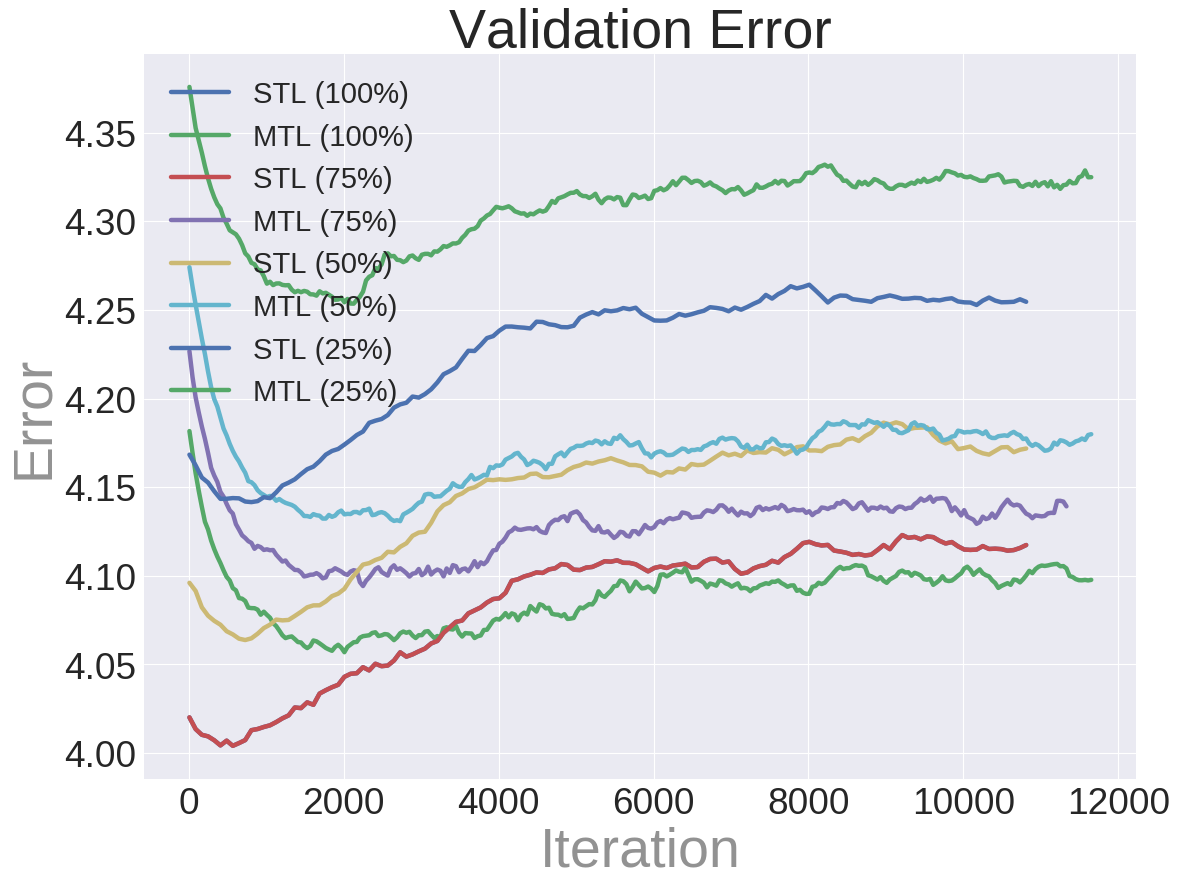

In [7]:
smooth_distance = 10
alpha = 0.
line_width = 4.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("Validation Error", size=size)
plt.ylabel("Error", size=size, alpha=0.5)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline 1 ################
lbl = "STL (100%)"

y = np.array(b_valid_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)


############# MTL 1 #################
lbl = "MTL (100%)"

y = np.array(valid_1_error['MTL_soft_with_1.0_of_the_data_and_bif_3_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_1_error['MTL_soft_with_1.0_of_the_data_and_bif_3_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############ Baseline 0.75 ################
lbl = "STL (75%)"

y = np.array(b_valid_0_75_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_0_75_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############# MTL 0.75 #################
lbl = "MTL (75%)"

y = np.array(valid_0_75_error['MTL_soft_with_0.75_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_0_75_error['MTL_soft_with_0.75_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############ Baseline 0.5 ################
lbl = "STL (50%)"

y = np.array(b_valid_0_5_error['baseline_with_0.5_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_0_5_error['baseline_with_0.5_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############# MTL 0.5 #################
lbl = "MTL (50%)"

y = np.array(valid_0_5_error['MTL_soft_with_0.5_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_0_5_error['MTL_soft_with_0.5_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############ Baseline 0.25 ################
lbl = "STL (25%)"

y = np.array(b_valid_0_25_error['baseline_with_0.25_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_0_25_error['baseline_with_0.25_of_the_data_soft_max_cross_entropy_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############# MTL 0.25 #################
lbl = "MTL (25%)"

y = np.array(valid_0_25_error['MTL_soft_with_0.25_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_0_25_error['MTL_soft_with_0.25_of_the_data_main_error'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
#plt.axis(ymax=4.2, ymin=4)
plt.legend(loc="best",prop={'size':size/1.9})
#plt.savefig("valid_error_ds_sizes.png", dpi=100)
plt.show()

In [9]:
print("STL 100%:\t{}".format(min(b_valid_1_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])))
print("MTL 100%:\t{}".format(min(valid_1_error['MTL_soft_with_1.0_of_the_data_and_bif_3_main_error'])))
print("STL 75%:\t{}".format(min(b_valid_0_75_error['baseline_with_1.0_of_the_data_soft_max_cross_entropy_error'])))
print("MTL 75%:\t{}".format(min(valid_0_75_error['MTL_soft_with_0.75_of_the_data_main_error'])))
print("STL 50%:\t{}".format(min(b_valid_0_5_error['baseline_with_0.5_of_the_data_soft_max_cross_entropy_error'])))
print("MTL 50%:\t{}".format(min(valid_0_5_error['MTL_soft_with_0.5_of_the_data_main_error'])))
print("STL 25%:\t{}".format(min(b_valid_0_25_error['baseline_with_0.25_of_the_data_soft_max_cross_entropy_error'])))
print("MTL 25%:\t{}".format(min(valid_0_25_error['MTL_soft_with_0.25_of_the_data_main_error'])))

STL 100%:	3.98109173775
MTL 100%:	4.04535245895
STL 75%:	3.98109173775
MTL 75%:	4.07193994522
STL 50%:	4.05070972443
MTL 50%:	4.11503744125
STL 25%:	4.12738132477
MTL 25%:	4.23326635361


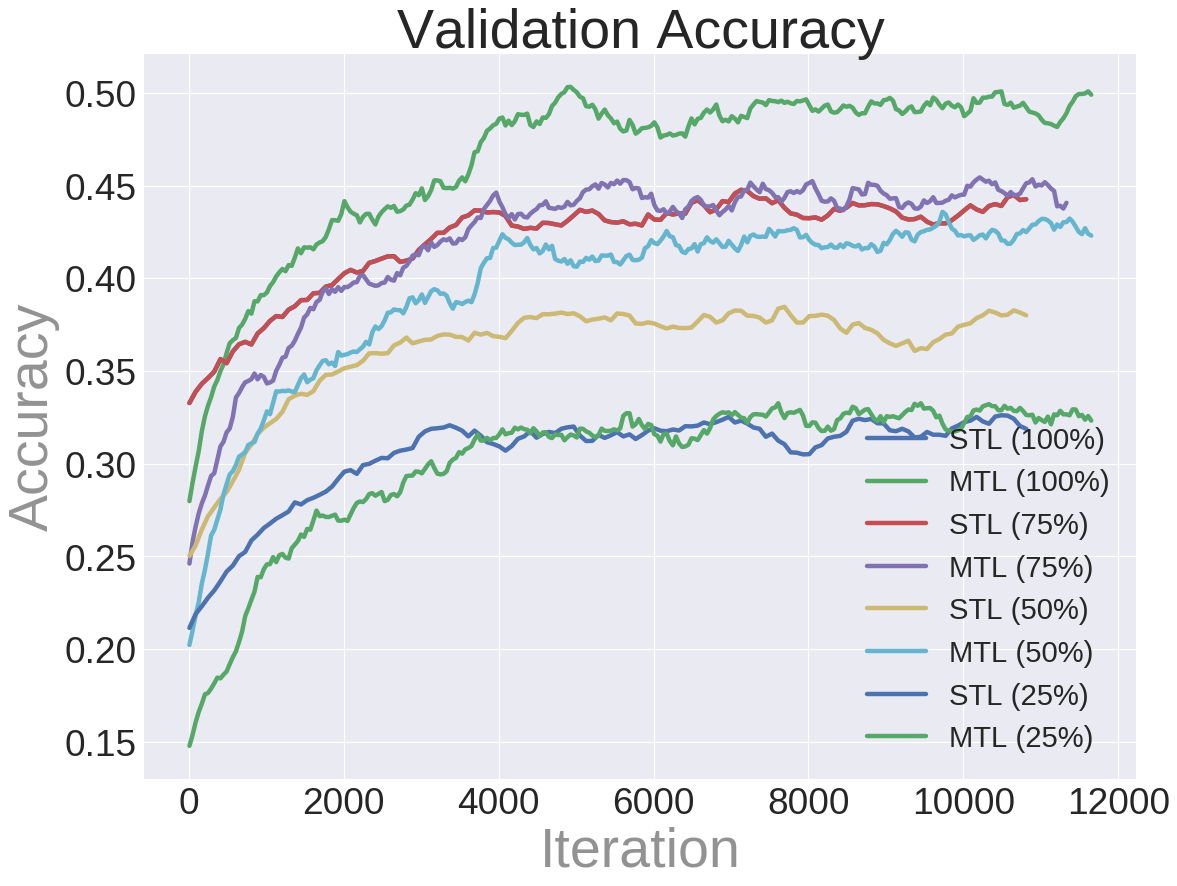

In [11]:
smooth_distance = 10
alpha = 0.
line_width = 4.0
size=50

plt.figure(figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title("Validation Accuracy", size=size)
plt.ylabel("Accuracy", size=size, alpha=0.5)
plt.xlabel("Iteration", size=size,alpha=0.5)

############ Baseline 1 ################
lbl = "STL (100%)"

y = np.array(b_valid_1_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_1_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)


############# MTL 1 #################
lbl = "MTL (100%)"

y = np.array(valid_1_acc['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_1_acc['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############ Baseline 0.75 ################
lbl = "STL (75%)"

y = np.array(b_valid_0_75_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_0_75_acc['baseline_with_1.0_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############# MTL 0.75 #################
lbl = "MTL (75%)"

y = np.array(valid_0_75_acc['MTL_soft_with_0.75_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_0_75_acc['MTL_soft_with_0.75_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############ Baseline 0.5 ################
lbl = "STL (50%)"

y = np.array(b_valid_0_5_acc['baseline_with_0.5_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_0_5_acc['baseline_with_0.5_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############# MTL 0.5 #################
lbl = "MTL (50%)"

y = np.array(valid_0_5_acc['MTL_soft_with_0.5_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_0_5_acc['MTL_soft_with_0.5_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############ Baseline 0.25 ################
lbl = "STL (25%)"

y = np.array(b_valid_0_25_acc['baseline_with_0.25_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 20 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(b_valid_0_25_acc['baseline_with_0.25_of_the_data_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 20 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

############# MTL 0.25 #################
lbl = "MTL (25%)"

y = np.array(valid_0_25_acc['MTL_soft_with_0.25_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(1), "same")[:-1]
x = np.array([4 * i * 10 + 1 for i in range(len(y_smooth))])
#plt.plot(x, y_smooth, alpha=alpha, linewidth=line_width)

y = np.array(valid_0_25_acc['MTL_soft_with_0.25_of_the_data_main_accuracy'])
y_smooth = np.convolve(y, np.ones(smooth_distance) / smooth_distance, "same")[smooth_distance:-smooth_distance]
x = np.array([4 * i * 10 + smooth_distance for i in range(len(y_smooth))])
plt.plot(x, y_smooth, label=lbl, linewidth=line_width)

plt.xticks(size=size/1.5)
plt.yticks(size=size/1.5)
#plt.axis(ymax=4.2, ymin=4)
plt.legend(loc="best",prop={'size':size/1.9})
#plt.savefig("valid_accuracy_ds_sizes.png", dpi=100)
plt.show()

In [14]:
print("STL 100%:\t{}".format(max(b_valid_1_acc['baseline_with_1.0_of_the_data_accuracy'])))
print("MTL 100%:\t{}".format(max(valid_1_acc['MTL_soft_with_1.0_of_the_data_and_bif_3_main_accuracy'])))
print("STL 75%:\t{}".format(max(b_valid_0_75_acc['baseline_with_1.0_of_the_data_accuracy'])))
print("MTL 75%:\t{}".format(max(valid_0_75_acc['MTL_soft_with_0.75_of_the_data_main_accuracy'])))
print("STL 50%:\t{}".format(max(b_valid_0_5_acc['baseline_with_0.5_of_the_data_accuracy'])))
print("MTL 50%:\t{}".format(max(valid_0_5_acc['MTL_soft_with_0.5_of_the_data_main_accuracy'])))
print("STL 25%:\t{}".format(max(b_valid_0_25_acc['baseline_with_0.25_of_the_data_accuracy'])))
print("MTL 25%:\t{}".format(max(valid_0_25_acc['MTL_soft_with_0.25_of_the_data_main_accuracy'])))

STL 100%:	0.469999969006
MTL 100%:	0.538999974728
STL 75%:	0.469999969006
MTL 75%:	0.49300006032
STL 50%:	0.413000017405
MTL 50%:	0.465000003576
STL 25%:	0.349000006914
MTL 25%:	0.365000009537
